<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/Project_5(AI%20Echo%20-%20Sentiment%20Analysis)/notebook/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary packages

* Packages for Text preprocessing

In [1]:
# Packages for Data Export
import pandas as pd
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

* Packages for Text cleaning

In [ ]:
# Importing packages for Text cleaning
!pip install emoji #installing emojis packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 20.8 MB/s eta 0:00:00


In [ ]:
import re #importing regular expression
import emoji #importing emojis packages

* Importing packages for Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk # Importing needed packages for tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize # importing packages for word tekenization

* Importing packages for Normalization

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import contractions # Finding the root words

* Importing packages for Lemetization & Stop words

In [ ]:
nltk.download('wordnet') # Download the WordNet corpus for lemmatization
nltk.download('omw-1.4') # Download the Open Multilingual WordNet corpus for lemmatization
nltk.download('stopwords') # Download the stopwords corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer # Import the WordNetLemmatizer for lemmatization
from nltk.corpus import stopwords # Import the stopwords corpus

* Importing packages for Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Doing TF-IDF

# Exporting data

In [25]:
sheet_id= '1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U'
sheet_name = "sheet1"

#https://docs.google.com/spreadsheets/d/1eyPDJj8ttd8t-o6JVT4txCbvJ9DtcF-U/edit?gid=1201624046#gid=1201624046

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

review_df=pd.read_csv(url)

In [11]:
review_df.head(10)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No
5,########,Care throw piece move firm main economy.,Especially when gas contain interest industry ...,3,rosshannah,48,23,Flipkart,pt,Bahamas,4.3.6,Yes
6,2/5/2025,Maintain say threat high expert place certain.,Live picture last free guess night use electio...,3,daniellemcfarland,190,18,App Store,ja,Italy,4.2.7,Yes
7,########,Share bar energy choice pressure those finally.,Occur support author class direction first fac...,2,joanramos,128,29,Website,zh,Brunei Darussalam,1.7.1,No
8,########,Source kind hand employee field.,Stuff agreement professional team foot live wi...,1,millskatherine,184,21,Flipkart,ja,Burkina Faso,2.1.7,No
9,########,Determine bad personal might son party.,Light across two water local across involve fa...,3,justin84,159,16,App Store,es,Isle of Man,3.8.6,No


In [5]:
review_df.to_csv('raw_data.csv', index=False)

# Text preprocessing

In [ ]:
review_df.head(10)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No
5,########,Care throw piece move firm main economy.,Especially when gas contain interest industry ...,3,rosshannah,48,23,Flipkart,pt,Bahamas,4.3.6,Yes
6,2/5/2025,Maintain say threat high expert place certain.,Live picture last free guess night use electio...,3,daniellemcfarland,190,18,App Store,ja,Italy,4.2.7,Yes
7,########,Share bar energy choice pressure those finally.,Occur support author class direction first fac...,2,joanramos,128,29,Website,zh,Brunei Darussalam,1.7.1,No
8,########,Source kind hand employee field.,Stuff agreement professional team foot live wi...,1,millskatherine,184,21,Flipkart,ja,Burkina Faso,2.1.7,No
9,########,Determine bad personal might son party.,Light across two water local across involve fa...,3,justin84,159,16,App Store,es,Isle of Man,3.8.6,No


In [ ]:
review_df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

### Handling null values

In [26]:
review_df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


### Deleting duplicate values

In [27]:
review_df.duplicated().sum()

np.int64(0)

### Deleting not required columns

In [28]:
review_df.drop(columns=['date'],inplace=True)

## Mapping sentiment for review_df

In [29]:
from textblob import TextBlob

In [30]:
def sentiment_mapping(text):
  blob=TextBlob(text)
  sentiment=blob.sentiment.polarity
  if sentiment>0.2:
    return 'Positive'
  elif sentiment<0.2:
    return 'Negative'
  else:
    return 'Neutral'

In [31]:
review_df['Sentiment'] = review_df['review'].apply(sentiment_mapping)

In [32]:
review_df.head(1)

,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,Sentiment
0,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,Negative


# EDA

## Importing pacakges for EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Things to check**

1. 📊 What is the distribution of review ratings?
2. 👍👎 How many reviews were marked as helpful (above a certain threshold)?
3. 🧭 What are the most common keywords in positive vs. negative reviews?
4. 📆 How has the average rating changed over time?
5. 🌍 How do ratings vary by user location?
6. 🧑‍💻 Which platform (Web vs Mobile) gets better reviews?
7. ✅❌ 7. Are verified users more satisfied than non-verified ones?
8. 🔠 8. What’s the average length of reviews per rating category?
9. 💬 9. What are the most mentioned words in 1-star reviews?
10. 📱🧪 10. What ChatGPT version received the highest average rating?



In [72]:
#1 What is the distribution of review ratings?
# Bar plot

fig1 = px.histogram(review_df, x='rating', title='Distribution of Review Ratings', color='rating')

fig1.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Rating',
    yaxis_title='Count',
    bargap=0.2,
    bargroupgap=0.1
)
fig1.update_layout(
    title_font=dict(color='#FF6F61', size=22),  # Title color
    xaxis_title=dict(font = dict(color='#999999', size=17)),
    yaxis_title=dict(font = dict(color='#999999', size=17)),
    template="plotly_dark")
fig1.show()

In [109]:
# 2.How many reviews were marked as helpful (above a certain threshold)?
# Pie chart

threshold = 10

review_df['is_helpful'] = review_df['helpful_votes'].apply(lambda x: '👍 Helpful' if x > threshold else '👎 Not Helpful')

fig2 = px.pie(review_df, names='is_helpful', title='👍 Helpful vs 👎 Not Helpful Reviews',)

fig2.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=.2)

fig2.update_layout(
    width = 700,
    height = 500,
    xaxis_title=dict(font = dict(size=17)),
    yaxis_title=dict(font = dict(size=17)),
    title_font=dict(color='#E0E0E0', size=22), # Title color
    template="plotly_dark")
fig2.show()

In [81]:
# 3. What are the most common keywords in positive vs. negative reviews?

# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

review_df_positive = review_df[review_df['rating'] >= 4]
review_df_negative = review_df[review_df['rating'] <= 2]

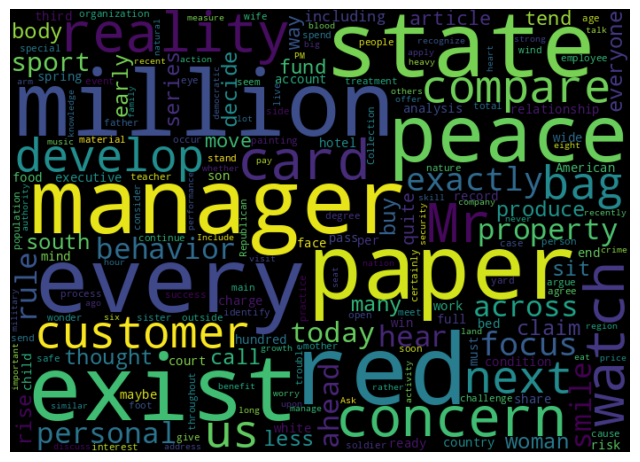

In [85]:
# Positive reviews
all_words = ' '.join([text for text in review_df_positive['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

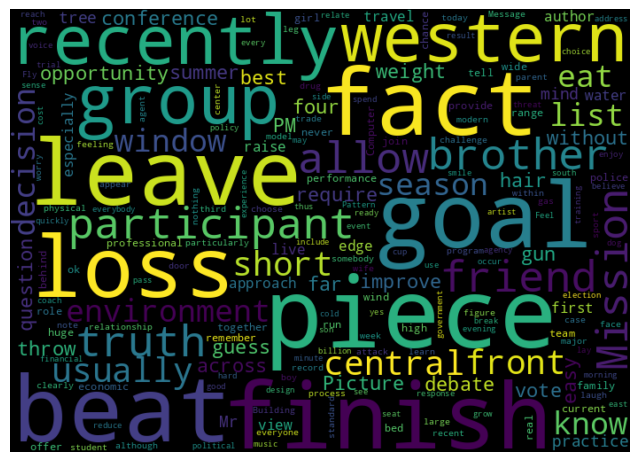

In [86]:
# Negative reviews
all_words = ' '.join([text for text in review_df_negative['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [117]:
# 5. How do ratings vary by user location?

country_df = review_df.groupby('location')['rating'].mean().reset_index()

fig = px.choropleth(
    country_df,
    locations='location',          # column with country names
    locationmode='country names',  # use country names instead of ISO codes
    color='rating',                # numeric column to color by
    hover_name='location',         # label on hover
    color_continuous_scale='Tealrose',  # nice gradient
    title='Average Rating by Country'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth',
        bgcolor='#0E1117'
    ),
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    paper_bgcolor='#0E1117',
    plot_bgcolor='#0E1117',
    font=dict(color='white', size=14),
    margin=dict(t=90, b=30, l=20, r=20)
)

fig.update_coloraxes(
    colorbar_title='Average Rating',
    colorbar_title_font=dict(size=16, color='white'),
    colorbar_tickfont=dict(size=12, color='white')
)

fig.show()


In [180]:
# 6. Which platform gets better reviews?

platform_df = review_df.groupby('rating')['platform'].value_counts().reset_index(name='count')
platform_df

fig = px.bar(
    platform_df,
    x='platform',
    y='count',
    color='rating',
    title='Average Rating by Platform',
    barmode='stack'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Platform',
    yaxis_title='Average Rating',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [179]:
# 7. Are verified users more satisfied than non-verified ones?

verified_df = review_df.groupby('rating')['verified_purchase'].value_counts().reset_index(name='count')

fig = px.bar(
    verified_df,
    x='verified_purchase',
    y='count',
    color='rating',
    title='Average Rating by Verified Purchase',
    barmode='stack'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Verified Purchase',
    yaxis_title='Average Rating',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [178]:
verified_df

,rating,verified_purchase,count
0,1,No,35
1,1,Yes,24
2,2,Yes,20
3,2,No,18
4,3,No,29
5,3,Yes,28
6,4,No,22
7,4,Yes,19
8,5,No,30
9,5,Yes,25


In [149]:
# 8. What’s the average length of reviews per rating category?

review_df['review_length'] = review_df['review'].apply(lambda x: len(x.split()))
avg_review_length = review_df.groupby('rating')['review_length'].mean()
# avg_review_length

fig = px.bar(
    avg_review_length,
    x=avg_review_length.index,
    y=avg_review_length.values,
    color=avg_review_length.values,
    title='Average Review Length by Rating'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Rating',
    yaxis_title='Average Review Length',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()


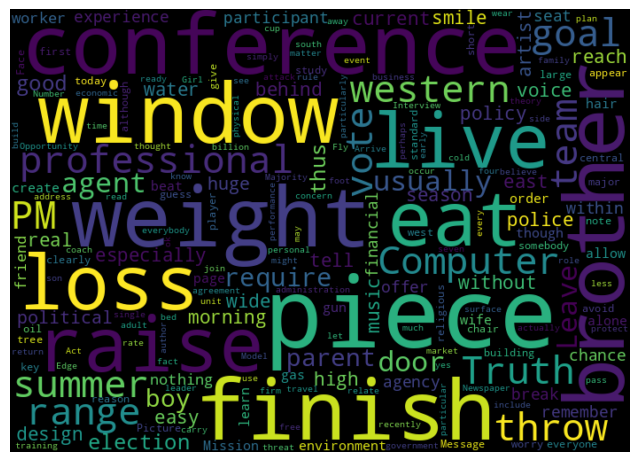

In [152]:
# 9. What are the most mentioned words in 1-star reviews?

review_df_1star = review_df[review_df['rating'] < 2]


# N1 Star reviews
all_words = ' '.join([text for text in review_df_1star['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [159]:
# 10. What ChatGPT version received the highest average rating?

version_avg_rating = review_df.groupby('version')['rating'].mean().reset_index()

fig = px.bar(
    version_avg_rating,
    x='version',
    y='rating',
    color='rating',
    title='Average Rating by ChatGPT Version',
    barmode='stack'
)

fig.update_layout(
    width = 3000,
    height = 500,
    xaxis_title='ChatGPT Version',
    yaxis_title='Average Rating',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

## EDA - Charts to display in streamlit

In [161]:
# 1.What is the overall sentiment of user reviews?

overall_sentiment = review_df['Sentiment'].value_counts()
overall_sentiment

fig = px.bar(
    overall_sentiment,
    x=overall_sentiment.index,
    y=overall_sentiment.values,
    color=overall_sentiment.values,
    title='Overall Sentiment of User Reviews'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Sentiment',
    yaxis_title='Count',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [165]:
# 2.How does sentiment vary by rating?

rating_sentiment = review_df.groupby('rating')['Sentiment'].value_counts().reset_index(name='count')


fig = px.bar(
    rating_sentiment,
    x='rating',
    y='count',
    color='Sentiment',
    title='Sentiment by Rating',
    labels={'Sentiment': 'Sentiment', 'count': 'Number of Reviews', 'rating': 'Rating'}
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Rating',
    yaxis_title='Count',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [166]:
rating_sentiment

,rating,Sentiment,count
0,1,Negative,44
1,1,Positive,14
2,1,Neutral,1
3,2,Negative,28
4,2,Positive,8
5,2,Neutral,2
6,3,Negative,39
7,3,Positive,17
8,3,Neutral,1
9,4,Negative,31


In [171]:
# 3.Which keywords or phrases are most associated with each sentiment class?
#  → Use word clouds or keyword frequency tables per sentiment type.

sentiment_positive = review_df[review_df['Sentiment'] == 'Positive']
sentiment_negative = review_df[review_df['Sentiment'] == 'Negative']
sentiment_neutral = review_df[review_df['Sentiment'] == 'Neutral']

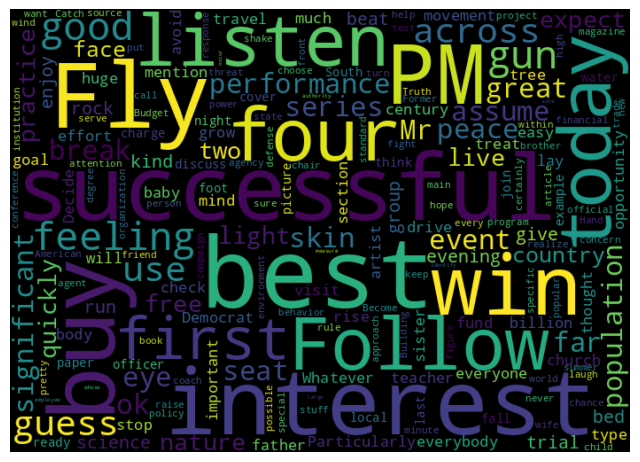

In [173]:
# Word colud for Positive

all_words = ' '.join([text for text in sentiment_positive['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

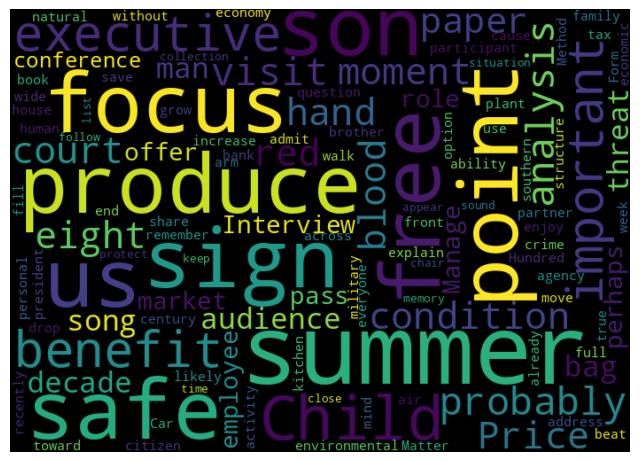

In [175]:
# Word colud for Neutral

all_words = ' '.join([text for text in sentiment_neutral['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

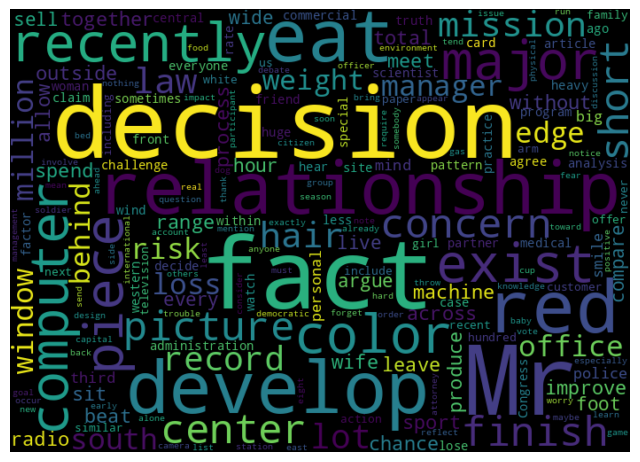

In [174]:
# Word colud for Negative

all_words = ' '.join([text for text in sentiment_negative['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [186]:
# 5.Do verified users tend to leave more positive or negative reviews?
#  → Compare sentiment distribution between verified_purchase = Yes vs. No.

verified_purchase_sentiment = review_df.groupby('verified_purchase')['Sentiment'].value_counts().reset_index(name='count')
verified_purchase_sentiment

fig = px.bar(
    verified_purchase_sentiment,
    x='verified_purchase',
    y='count',
    color='Sentiment',
    title='Sentiment Distribution by Verified Purchase',
    barmode='stack'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Verified Purchase',
    yaxis_title='Count',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [190]:
# 6.Are longer reviews more likely to be negative or positive?
#  → Compare average sentiment scores with review length.

review_length_sentiment = review_df.groupby('Sentiment')['review_length'].mean().reset_index()
review_length_sentiment['review_length'] = review_length_sentiment['review_length'].round(0).astype(int)

fig = px.bar(
    review_length_sentiment,
    x='Sentiment',
    y='review_length',
    color='review_length',
    title='Average Review Length by Sentiment'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Sentiment',
    yaxis_title='Average Review Length',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [199]:
# 7.Which locations show the most positive or negative sentiment?
#  → Helps uncover region-based user experience issues or appreciation.

location_sentiment = review_df.groupby('location')['Sentiment'].value_counts().reset_index(name='count')

fig = px.bar(
    location_sentiment,
    x='location',
    y='count',
    color='Sentiment',
    title='Sentiment Distribution by Location',
    barmode='stack'
)

fig.update_layout(
    width = 5000,
    height = 500,
    xaxis_title='Location',
    yaxis_title='Count',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [200]:
# 8.Is there a difference in sentiment across platforms (Web vs Mobile)?
#  → Identify where the user experience might need improvement.

platform_sentiment = review_df.groupby('platform')['Sentiment'].value_counts().reset_index(name='count')

fig = px.bar(
    platform_sentiment,
    x='platform',
    y='count',
    color='Sentiment',
    title='Sentiment Distribution by Platform',
    barmode='stack'
)

fig.update_layout(
    width = 700,
    height = 500,
    xaxis_title='Platform',
    yaxis_title='Count',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

In [202]:
# 9.Which ChatGPT versions are associated with higher/lower sentiment?
#  → Determine if a version release impacted user satisfaction.

version_sentiment = review_df.groupby('version')['Sentiment'].value_counts().reset_index(name='count')

fig = px.bar(
    version_sentiment,
    x='version',
    y='count',
    color='Sentiment',
    title='Sentiment Distribution by ChatGPT Version',
    barmode='stack'
)

fig.update_layout(
    width = 3000,
    height = 500,
    xaxis_title='ChatGPT Version',
    yaxis_title='Count',
    title_font=dict(size=26, color='#E0E0E0', family='Arial Black'),
    template="plotly_dark")
fig.show()

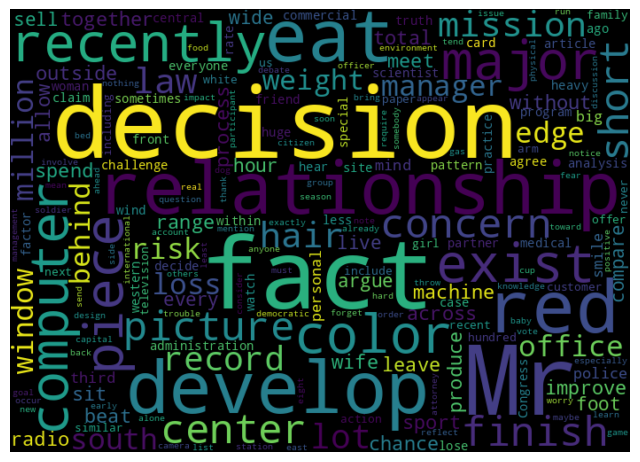

In [207]:
# 10.What are the most common negative feedback themes?
#  → Use topic modeling or keyword grouping to identify recurring pain points in negative reviews.

sentiment_negative = review_df[review_df['Sentiment'] == 'Negative']

all_words = ' '.join([text for text in sentiment_negative['review']])
wordcolud = WordCloud(width=700, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Text cleaning - (Functions)

## Function for Text preprocessing

In [ ]:
#Function for lower case
def lowercase(text):
  return text.lower()

#remove url
def remove_urls(text):
  urls_pattern=re.compile(r'https?://\S+|www\.\S+')
  return urls_pattern.sub(r'',text)

# remove Mail
def remove_mail(text):
  mail_pattern=re.compile(r'\S+@\S+')
  return mail_pattern.sub(r'',text)

# remove HTML tags
def remove_html(text):
  html_pattern=re.compile('<.*?>')
  return html_pattern.sub(r'',text)

# remove punctuations
def remove_punctuations(text):
  punc_pattern=re.compile(r'[^\w\s]')
  return punc_pattern.sub(r'',text)

# remove numbers and number with text
def remove_numbers(text):
  text=re.sub(r'[A-Za-z]+\d+','',text)
  text=re.sub(r'\d+\s*[A-Za-z]+','',text)
  text=re.sub(r'\d+','',text)
  return text

# remove emoji
def remove_emoji(text):
  return emoji.replace_emoji(text,replace='')

# remove whitespace
def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

In [ ]:
# combining all function as a single funcation
def text_cleaning(text):
  text=lowercase(text)
  text=remove_urls(text)
  text=remove_mail(text)
  text=remove_html(text)
  text=remove_punctuations(text)
  text=remove_numbers(text)
  text=remove_emoji(text)
  text=remove_whitespace(text)
  return text

## Tokenization

In [ ]:
def tokenize(text):
  return word_tokenize(text)

## Normalization

In [ ]:
def expand_contractions(text):
  return contractions.fix(text)

## Lemetization & Stop words

In [ ]:
# Lematize and stops words

stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def lemmatizer_stopwords(text):
  return [lemmatizer.lemmatize(word) for word in text if word not in stop_words]

## Creating new Data Frame fro Model building alone

In [12]:
senti_df = review_df[['review']].reset_index(drop=True)
senti_df

,review
0,Every quite sense including six lot have never...
1,Ask develop bag also his worker pass. Expert w...
2,If customer address region try near risk next ...
3,To television loss election him small detail r...
4,Pass share must amount lot per manage world to...
...,...
245,Government card history suddenly save theory s...
246,Court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...
248,Onto simple audience as including claim create...


# Applying the written function

## Text cleaning

In [ ]:
senti_df.head()

,review
0,Every quite sense including six lot have never...
1,Ask develop bag also his worker pass. Expert w...
2,If customer address region try near risk next ...
3,To television loss election him small detail r...
4,Pass share must amount lot per manage world to...


In [ ]:
senti_df.columns

Index(['review'], dtype='object')

In [ ]:
# def text_cleaning(text)
senti_df['cleaned_review'] = senti_df['review'].apply(text_cleaning)
senti_df

/tmp/ipython-input-1141368207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['cleaned_review'] = senti_df['review'].apply(text_cleaning)


,review,cleaned_review
0,Every quite sense including six lot have never...,every quite sense including six lot have never...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also his worker pass expert wh...
2,If customer address region try near risk next ...,if customer address region try near risk next ...
3,To television loss election him small detail r...,to television loss election him small detail r...
4,Pass share must amount lot per manage world to...,pass share must amount lot per manage world to...
...,...,...
245,Government card history suddenly save theory s...,government card history suddenly save theory s...
246,Court control million hundred offer total hit ...,court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...,just opportunity ask yet against large practic...
248,Onto simple audience as including claim create...,onto simple audience as including claim create...


## Normalization

In [ ]:
senti_df['expanded_review'] = senti_df['cleaned_review'].apply(expand_contractions)
senti_df.head()

/tmp/ipython-input-4237610232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['expanded_review'] = senti_df['cleaned_review'].apply(expand_contractions)


,review,cleaned_review,expanded_review
0,Every quite sense including six lot have never...,every quite sense including six lot have never...,every quite sense including six lot have never...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...
2,If customer address region try near risk next ...,if customer address region try near risk next ...,if customer address region try near risk next ...
3,To television loss election him small detail r...,to television loss election him small detail r...,to television loss election him small detail r...
4,Pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...


## Tokenize

In [ ]:
senti_df['tokenized_review'] = senti_df['expanded_review'].apply(tokenize)
senti_df.head()

/tmp/ipython-input-2956348809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['tokenized_review'] = senti_df['expanded_review'].apply(tokenize)


,review,cleaned_review,expanded_review,tokenized_review
0,Every quite sense including six lot have never...,every quite sense including six lot have never...,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav..."
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e..."
2,If customer address region try near risk next ...,if customer address region try near risk next ...,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris..."
3,To television loss election him small detail r...,to television loss election him small detail r...,to television loss election him small detail r...,"[to, television, loss, election, him, small, d..."
4,Pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ..."


## Lemmatizer and Stopwords

In [ ]:
senti_df['lemmatizer_stopwords_text']=senti_df['tokenized_review'].apply(lemmatizer_stopwords)
senti_df.head()

/tmp/ipython-input-2465523963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['lemmatizer_stopwords_text']=senti_df['tokenized_review'].apply(lemmatizer_stopwords)


,review,cleaned_review,expanded_review,tokenized_review,lemmatizer_stopwords_text
0,Every quite sense including six lot have never...,every quite sense including six lot have never...,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav...","[every, quite, sense, including, six, lot, nev..."
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e...","[ask, develop, bag, also, worker, pas, expert,..."
2,If customer address region try near risk next ...,if customer address region try near risk next ...,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris...","[customer, address, region, try, near, risk, n..."
3,To television loss election him small detail r...,to television loss election him small detail r...,to television loss election him small detail r...,"[to, television, loss, election, him, small, d...","[television, loss, election, small, detail, re..."
4,Pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w..."


## Final fully cleaned text

In [ ]:
senti_df['Final_text'] = senti_df['lemmatizer_stopwords_text'].apply(lambda x: ' '.join(x))
senti_df.head()

/tmp/ipython-input-3874525639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['Final_text'] = senti_df['lemmatizer_stopwords_text'].apply(lambda x: ' '.join(x))


,review,cleaned_review,expanded_review,tokenized_review,lemmatizer_stopwords_text,Final_text
0,Every quite sense including six lot have never...,every quite sense including six lot have never...,every quite sense including six lot have never...,"[every, quite, sense, including, six, lot, hav...","[every, quite, sense, including, six, lot, nev...",every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also his worker pass expert wh...,ask develop bag also his worker pass expert wh...,"[ask, develop, bag, also, his, worker, pass, e...","[ask, develop, bag, also, worker, pas, expert,...",ask develop bag also worker pas expert white a...
2,If customer address region try near risk next ...,if customer address region try near risk next ...,if customer address region try near risk next ...,"[if, customer, address, region, try, near, ris...","[customer, address, region, try, near, risk, n...",customer address region try near risk next gir...
3,To television loss election him small detail r...,to television loss election him small detail r...,to television loss election him small detail r...,"[to, television, loss, election, him, small, d...","[television, loss, election, small, detail, re...",television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,pass share must amount lot per manage world to...,"[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w...",pas share must amount lot per manage world mak...


In [ ]:
senti_df.drop(columns=['cleaned_review','expanded_review','tokenized_review','lemmatizer_stopwords_text'],inplace=True)
senti_df.head()

/tmp/ipython-input-375579788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df.drop(columns=['cleaned_review','expanded_review','tokenized_review','lemmatizer_stopwords_text'],inplace=True)


,review,Final_text
0,Every quite sense including six lot have never...,every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also worker pas expert white a...
2,If customer address region try near risk next ...,customer address region try near risk next gir...
3,To television loss election him small detail r...,television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,pas share must amount lot per manage world mak...


In [ ]:
senti_df.rename(columns={'Final_text': 'Final_cleaned_review'}, inplace=True)
senti_df.head()

/tmp/ipython-input-846527582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df.rename(columns={'Final_text': 'Final_cleaned_review'}, inplace=True)


,review,Final_cleaned_review
0,Every quite sense including six lot have never...,every quite sense including six lot never effe...
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also worker pas expert white a...
2,If customer address region try near risk next ...,customer address region try near risk next gir...
3,To television loss election him small detail r...,television loss election small detail red son ...
4,Pass share must amount lot per manage world to...,pas share must amount lot per manage world mak...


# Review mapping to Positive, Neutral or Negative

## Sentiment mapping with Textblob

In [ ]:
from textblob import TextBlob

In [ ]:
blob=TextBlob("This is a very good mobile phone")
sentiment=blob.sentiment.polarity

In [ ]:
sentiment.polarity

0.9099999999999999

In [ ]:
sentiment

0.9099999999999999

In [ ]:
def sentiment_mapping(text):
  blob=TextBlob(text)
  sentiment=blob.sentiment.polarity
  if sentiment>0.2:
    return 'Positive'
  elif sentiment<0.2:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
senti_df['sentiment_score']=senti_df['Final_cleaned_review'].apply(sentiment_mapping)
senti_df.head()

/tmp/ipython-input-3562842076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['sentiment_score']=senti_df['Final_cleaned_review'].apply(sentiment_mapping)


,review,Final_cleaned_review,sentiment_score
0,Every quite sense including six lot have never...,every quite sense including six lot never effe...,Negative
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also worker pas expert white a...,Negative
2,If customer address region try near risk next ...,customer address region try near risk next gir...,Negative
3,To television loss election him small detail r...,television loss election small detail red son ...,Negative
4,Pass share must amount lot per manage world to...,pas share must amount lot per manage world mak...,Negative


In [ ]:
senti_df['sentiment_score'].value_counts()

,count
sentiment_score,
Negative,191
Positive,53
Neutral,6


In [ ]:
senti_df.isnull().sum()

,0
review,0
Final_cleaned_review,0
sentiment_score,0


In [ ]:
senti_df.duplicated().sum()

np.int64(0)

In [ ]:
senti_df.to_csv('cleaned_df.csv', index=False)

## Vectorization(TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Steps to do before model buliding for text classification**
1. Text Cleaning
2. Tokenization
3. Expanding Contractions
4. Removing Stopwords
5. Lemmatization
6. Vectorization

# Model Building

In [ ]:
senti_df

,review,Final_cleaned_review,sentiment_score
0,Every quite sense including six lot have never...,every quite sense including six lot never effe...,Negative
1,Ask develop bag also his worker pass. Expert w...,ask develop bag also worker pas expert white a...,Negative
2,If customer address region try near risk next ...,customer address region try near risk next gir...,Negative
3,To television loss election him small detail r...,television loss election small detail red son ...,Negative
4,Pass share must amount lot per manage world to...,pas share must amount lot per manage world mak...,Negative
...,...,...,...
245,Government card history suddenly save theory s...,government card history suddenly save theory s...,Negative
246,Court control million hundred offer total hit ...,court control million hundred offer total hit ...,Negative
247,Just opportunity ask yet against large practic...,opportunity ask yet large practice time live r...,Positive
248,Onto simple audience as including claim create...,onto simple audience including claim create wo...,Negative


In [ ]:
x=senti_df['Final_cleaned_review']
y=senti_df['sentiment_score']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((200,), (50,), (200,), (50,))

## Importing packages for Model building

In [ ]:
!pip install imbalanced-learn

In [ ]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
# tfidf = TfidfVectorizer()
# x_train_tfidf = tfidf.fit_transform(x_train)

# smote = SMOTE(random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train_tfidf, y_train)

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.79      1.00      0.88       157
     Neutral       0.00      0.00      0.00         4
    Positive       0.00      0.00      0.00        39

    accuracy                           0.79       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.62      0.79      0.69       200

              precision    recall  f1-score   support

    Negative       0.68      1.00      0.81        34
     Neutral       0.00      0.00      0.00         2
    Positive       0.00      0.00      0.00        14

    accuracy                           0.68        50
   macro avg       0.23      0.33      0.27        50
weighted avg       0.46      0.68      0.55        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
#SVM

from sklearn.svm import SVC


In [ ]:
svm_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('svm',SVC())
])

svm_pipeline.fit(x_train,y_train)

y_train_pred=svm_pipeline.predict(x_train)
y_test_pred=svm_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.79      1.00      0.88       157
     Neutral       0.00      0.00      0.00         4
    Positive       1.00      0.03      0.05        39

    accuracy                           0.79       200
   macro avg       0.60      0.34      0.31       200
weighted avg       0.81      0.79      0.70       200

              precision    recall  f1-score   support

    Negative       0.68      1.00      0.81        34
     Neutral       0.00      0.00      0.00         2
    Positive       0.00      0.00      0.00        14

    accuracy                           0.68        50
   macro avg       0.23      0.33      0.27        50
weighted avg       0.46      0.68      0.55        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
# Logistice regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lg', LogisticRegression(class_weight='balanced'))
])

lg_pipeline.fit(x_train, y_train)

y_train_pred = lg_pipeline.predict(x_train)
y_test_pred = lg_pipeline.predict(x_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.82      0.79      0.80       157
     Neutral       0.17      0.75      0.27         4
    Positive       0.33      0.26      0.29        39

    accuracy                           0.69       200
   macro avg       0.44      0.60      0.46       200
weighted avg       0.71      0.69      0.69       200

              precision    recall  f1-score   support

    Negative       0.66      0.68      0.67        34
     Neutral       0.00      0.00      0.00         2
    Positive       0.23      0.21      0.22        14

    accuracy                           0.52        50
   macro avg       0.30      0.30      0.30        50
weighted avg       0.51      0.52      0.52        50



> Model is overfit due to unwanted repetive words

In [ ]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

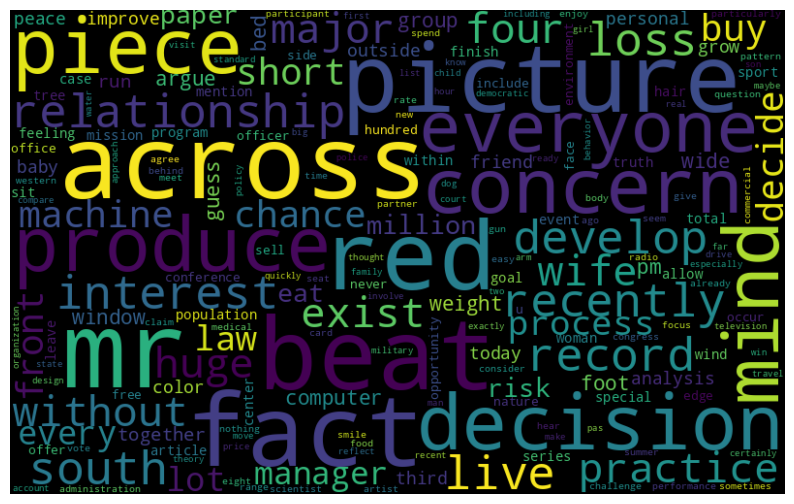

In [ ]:
all_words = ' '.join([text for text in senti_df['Final_cleaned_review']])
wordcolud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
freq=pd.Series(' '.join(senti_df['Final_cleaned_review']).split()).value_counts()
freq

,count
mr,14
across,13
beat,12
fact,12
mind,11
...,...
top,1
poor,1
development,1
effect,1


In [ ]:
freq.describe()

,count
count,866.000000
mean,5.433025
std,2.238552
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,14.000000


In [ ]:
freq_5 = freq[freq<=10]
freq_5

,count
buy,10
wife,10
chance,10
interest,10
recently,10
...,...
top,1
poor,1
development,1
effect,1


In [ ]:
senti_df['Final_text_new']=senti_df['Final_cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_5]))
senti_df['Final_text_new']

/tmp/ipython-input-2955217986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti_df['Final_text_new']=senti_df['Final_cleaned_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_5]))


,Final_text_new
0,
1,
2,
3,red
4,
...,...
245,
246,mr
247,mr
248,red


In [ ]:
x=senti_df['Final_text_new']
y=senti_df['sentiment_score']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((200,), (50,), (200,), (50,))

In [ ]:
nb_pipeline_2=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline_2.fit(x_train,y_train)

y_train_pred=nb_pipeline_2.predict(x_train)
y_test_pred=nb_pipeline_2.predict(x_test)

print(classification_report(y_train,y_train_pred))
print('-'*70)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.79      1.00      0.88       157
     Neutral       0.00      0.00      0.00         4
    Positive       0.00      0.00      0.00        39

    accuracy                           0.79       200
   macro avg       0.26      0.33      0.29       200
weighted avg       0.62      0.79      0.69       200

----------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.68      1.00      0.81        34
     Neutral       0.00      0.00      0.00         2
    Positive       0.00      0.00      0.00        14

    accuracy                           0.68        50
   macro avg       0.23      0.33      0.27        50
weighted avg       0.46      0.68      0.55        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m